In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('C:/Users/Microsoft/Desktop/Projects/Python Projects/Manutencao-Preditiva/data/ai4i2020.csv')

In [18]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [9]:
# Info básico
print(df.info())
print(df['Type'].value_counts())
print(df['Machine failure'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

Text(0.5, 1.0, 'Distribuição de Falhas')

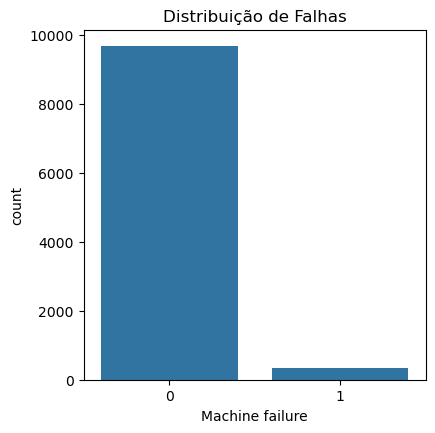

In [ ]:
# Visualizações
plt.figure(figsize=(15, 10))
# 1. Distribuição das falhas
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Falha de Máquina')
plt.title('Distribuição de Falhas')

Text(0.5, 1.0, 'Falhas por Tipo de Produto')

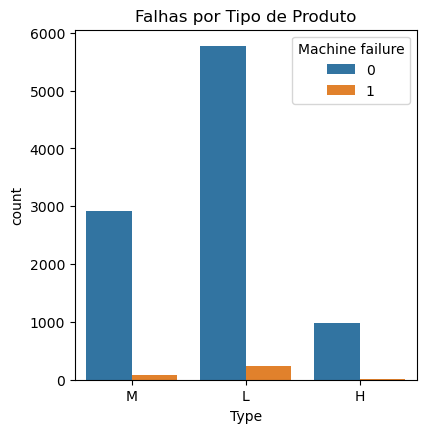

In [ ]:
# 2. Tipo de produto
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Type', hue='Falha de Máquina')
plt.title('Falhas por Tipo de Produto')

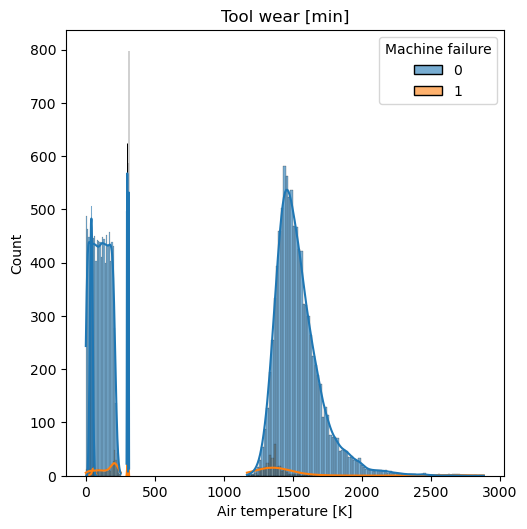

In [16]:
# 3. Histogramas das features numéricas
plt.figure(figsize=(15, 10))
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
for i, feat in enumerate(features):
    plt.subplot(2, 3, 3)
    sns.histplot(data=df, x=feat, hue='Machine failure', kde=True, alpha=0.6)
    plt.title(feat)

plt.tight_layout()
plt.show()

In [21]:
df = df.drop(columns=['Product ID'], errors='ignore')  


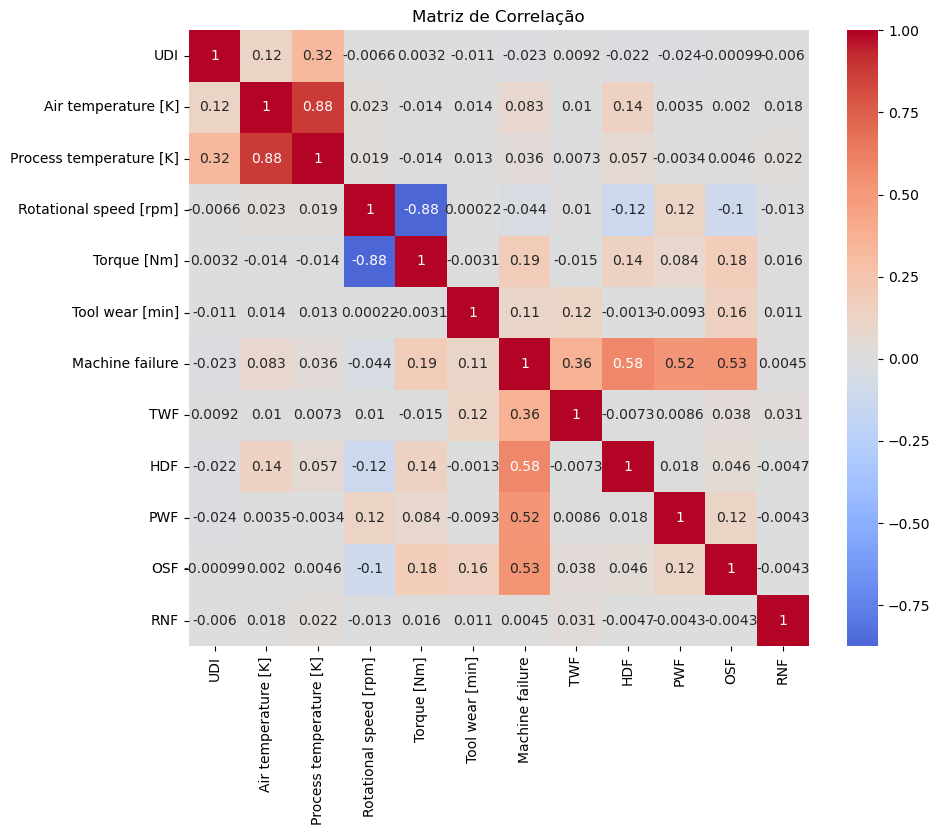

In [23]:
# Correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

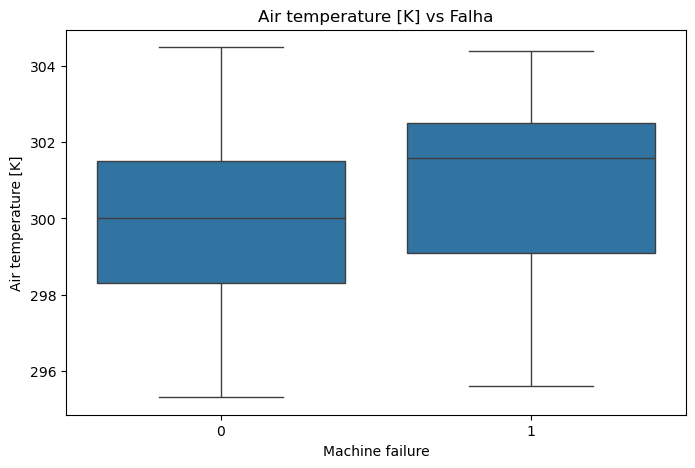

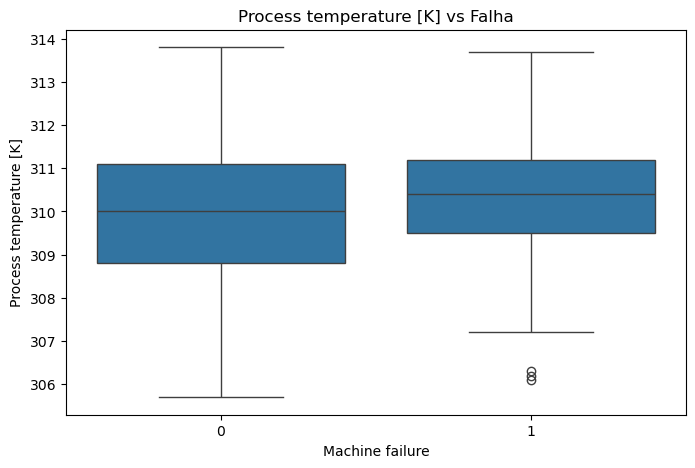

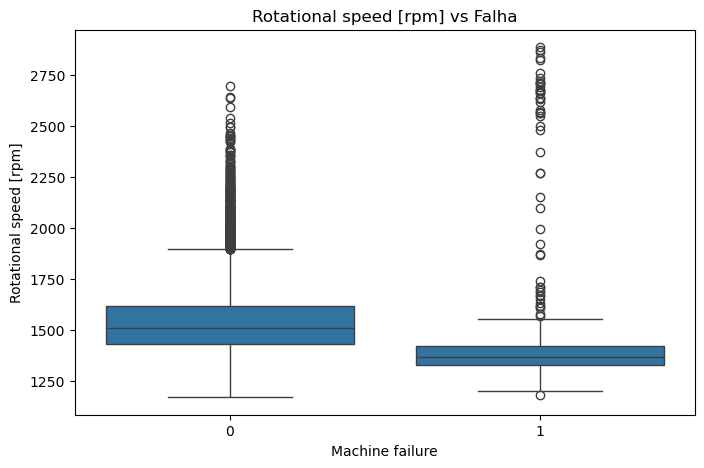

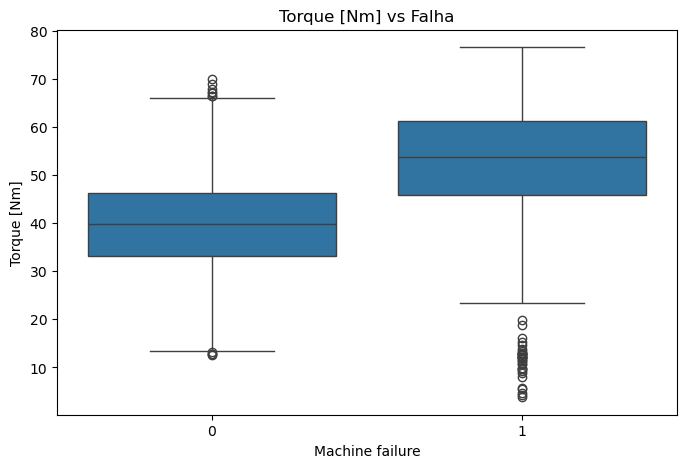

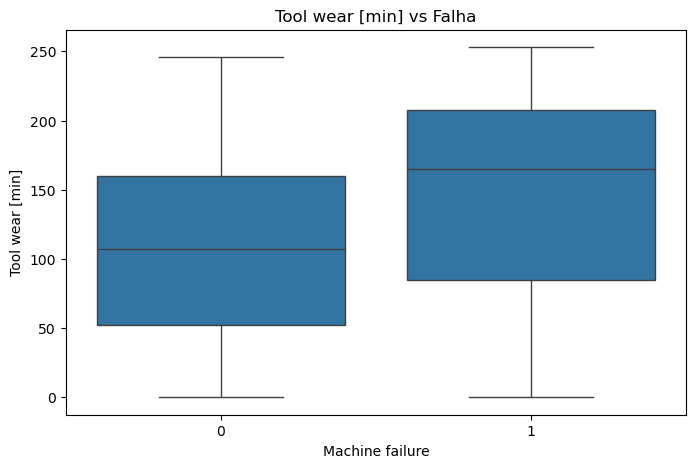

In [20]:
# Boxplots por tipo de falha
for feat in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Machine failure', y=feat)
    plt.title(f'{feat} vs Falha')
    plt.show()
    